In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

 ## Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [2]:
df_age = df[["연령대코드(5세단위)"]]
df_age

,연령대코드(5세단위)
0,13
1,8
2,8
3,12
4,8
...,...
999995,9
999996,9
999997,12
999998,11


In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

# 데이터프레임값 변경하기
df_age = df_age.replace(age_code)

# groupby 사용해서 연령대에 따른 허리둘레의 기술통계값 구하기
df_Q1 = df.copy() #원본 파일 변경을 방지하기 위해 copy()사용
df_Q1 = df_Q1.rename(columns = {'연령대코드(5세단위)':'연령대'})
df_Q1["연령대"] = df_age
df_Q1.groupby("연령대")["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

<AxesSubplot:>

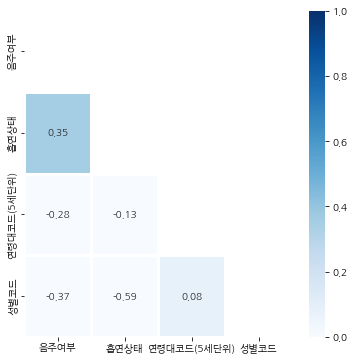

In [4]:
#컬럼 정하기
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

#위 컬럼명들만 df_small이라는 데이터프레임에 담은 뒤 상관관계를 구함
df_small = df[columns]
df_corr = df_small.corr()

# heatmap을 위한 mask 설정
mask = np.triu(np.ones_like(df_corr, dtype='bool'))

# 위에서 구한 상관계수를 heatmap을 통해 표현
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot =True, fmt = ".2f", cmap='Blues', mask = mask,vmax=1, vmin=0, linewidths = 3)

# Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
* 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

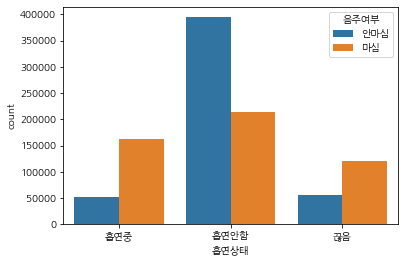

In [5]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 데이터프레임 값 변경하기
df_Q3 = df.copy() #원본 파일 변경을 방지하기 위해 copy()사용

df_Q3[["흡연상태"]] = df_Q3[["흡연상태"]].replace(smoke)
df_Q3[["음주여부"]] = df_Q3[["음주여부"]].replace(drink)

df_crosstab = pd.crosstab(index = [df_Q3.음주여부], columns = df_Q3.흡연상태)
sns.countplot(data=df_Q3, x="흡연상태", hue="음주여부" )

##  Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


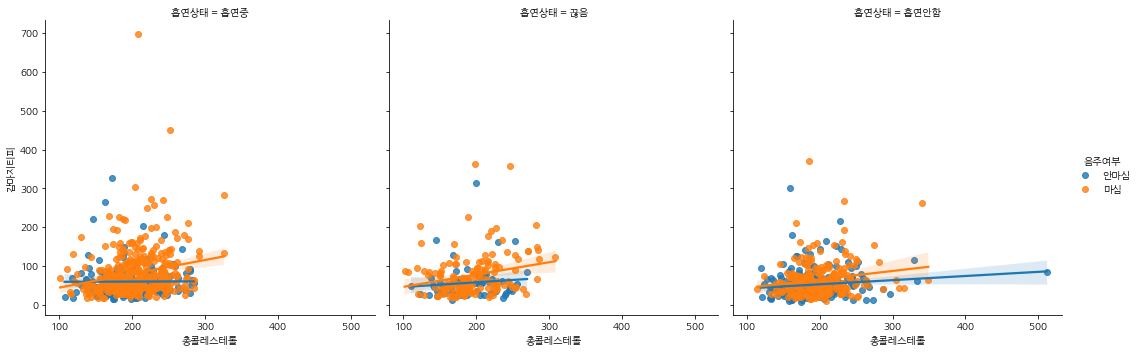

In [6]:
df_120 = df_Q3[df_Q3["체중(5Kg 단위)"] >=120]

sns.lmplot(data=df_120, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

 # Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
* 서브플롯으로 시각화하여 표현해주세요.

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

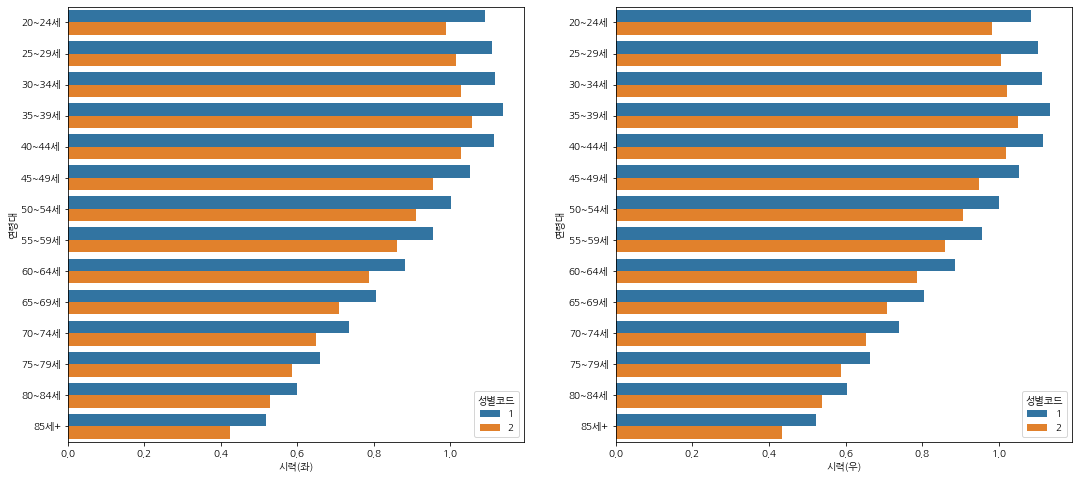

In [115]:
# 실명 데이터 제거하기
df_left_idx = df[df['시력(좌)'] == 9.9].index.tolist()
df_right_idx = df[df['시력(우)'] == 9.9].index.tolist()
idx_total = df_left_idx + df_right_idx

# 실명 데이터가 포함된 행 제거하기
df_Q5 = df_Q1.copy()
df_Q5=df_Q5.drop(index = idx_total)

# '연령대'로 정렬하기
df_Q5 = df_Q5.sort_values(by="연령대")

# 서브플롯으로 시각화하기, seaborn 사용
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot(data = df_Q5, y="연령대", x="시력(좌)", hue="성별코드",ci=None, ax= ax[0])
sns.barplot(data = df_Q5, y="연령대", x="시력(우)", hue="성별코드",ci=None, ax= ax[1])